In [ ]:
# importamos los módulos que se usan en todo el cuaderno
import pandas as pd
import json
import gzip
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
#en json1 usamos ast.literal_eval para procesar cada línea en cadena del archivo como un type dict python.
#en json2 usamos json.loads para cargar directamente las líneas como objetos json.
#en ambos casos los datos se acumulan como listas.

def json1(archivo):
    data = []
    with gzip.open(archivo, 'rt', encoding='utf-8') as file:
        for line in file:
            data.append(ast.literal_eval(line.strip()))
    return data

def json2(archivo):
    data = []
    with gzip.open(archivo, 'rt', encoding='utf-8') as file:
        for line in file:
            data.append(json.loads(line))
    return data

In [ ]:
# rutas de las tablas
items = "/content/drive/MyDrive/PI/users_items.json.gz"
reviews = "/content/drive/MyDrive/PI/user_reviews.json.gz"
games = "/content/drive/MyDrive/PI/steam_games.json.gz"

# con las funciones transformamos las listas en dataframe y pedimos info
data1 = json1(items)
df_item = pd.DataFrame(data1)
df_item.info()

data2 = json1(reviews)
df_review = pd.DataFrame(data2)
df_review.info()

data3 = json2(games)
df_games = pd.DataFrame(data3)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      88310 non-null  object
 1   items_count  88310 non-null  int64 
 2   steam_id     88310 non-null  object
 3   user_url     88310 non-null  object
 4   items        88310 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25799 entries, 0 to 25798
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   25799 non-null  object
 1   user_url  25799 non-null  object
 2   reviews   25799 non-null  object
dtypes: object(3)
memory usage: 604.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher     2

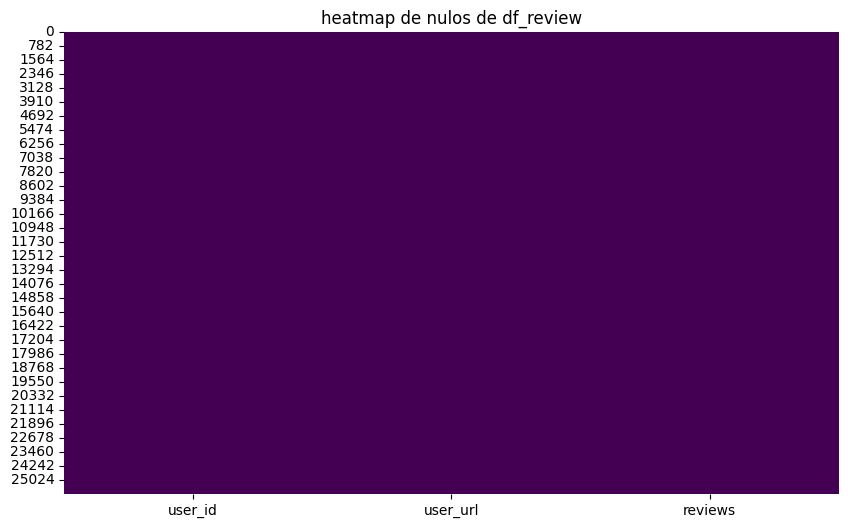

In [ ]:
# visualizamos df_review para ver los datos nulos
plt.figure(figsize=(10, 6))
sns.heatmap(df_review.isnull(), cbar=False, cmap='viridis')
plt.title('heatmap de nulos de df_review')
plt.show()

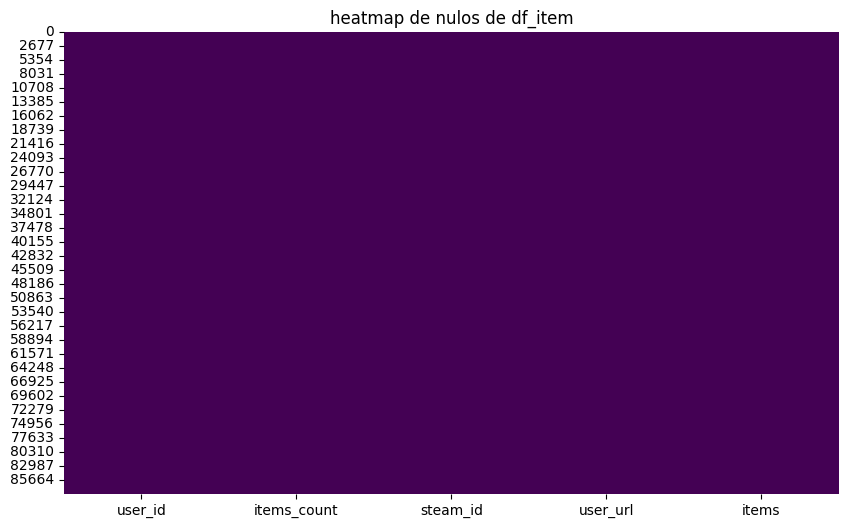

In [ ]:
# visualizamos df_item para ver los datos nulos
plt.figure(figsize=(10, 6))
sns.heatmap(df_item.isnull(), cbar=False, cmap='viridis')
plt.title('heatmap de nulos de df_item')
plt.show()

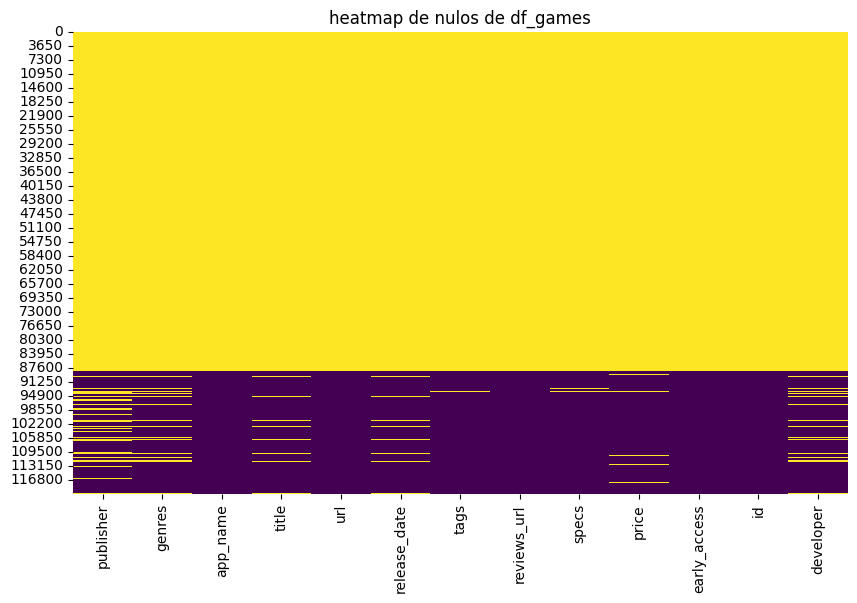

In [ ]:
# visualizamos df_games para ver los datos nulos
plt.figure(figsize=(10, 6))
sns.heatmap(df_games.isnull(), cbar=False, cmap='viridis')
plt.title('heatmap de nulos de df_games')
plt.show()

In [ ]:
# dropeamos los nulos de todas las tablas, y renombramos agregándoles "_sn" (sin nulos)
df_item_sn = df_item.dropna()
df_review_sn = df_review.dropna()
df_games_sn = df_games.dropna()

# validamos
df_item_sn.head()


,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."


In [ ]:
df_review_sn.head()

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."


In [ ]:
df_games_sn.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域
88315,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",http://steamcommunity.com/app/772540/reviews/?...,"[Single-player, Steam Achievements]",3.99,False,772540,Trickjump Games Ltd


In [ ]:
# vemos el tipo de dato de la columna anidada
contenido = df_item_sn.iloc[0, df_item_sn.columns.get_loc("items")]
print(contenido)
type(contenido)

[{'item_id': '10', 'item_name': 'Counter-Strike', 'playtime_forever': 6, 'playtime_2weeks': 0}, {'item_id': '20', 'item_name': 'Team Fortress Classic', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '30', 'item_name': 'Day of Defeat', 'playtime_forever': 7, 'playtime_2weeks': 0}, {'item_id': '40', 'item_name': 'Deathmatch Classic', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '50', 'item_name': 'Half-Life: Opposing Force', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '60', 'item_name': 'Ricochet', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '70', 'item_name': 'Half-Life', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '130', 'item_name': 'Half-Life: Blue Shift', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '300', 'item_name': 'Day of Defeat: Source', 'playtime_forever': 4733, 'playtime_2weeks': 0}, {'item_id': '240', 'item_name': 'Counter-Strike: Source', 'playtime_forever': 1853, 'playtime_2weeks': 0}, {'item_i

list

In [ ]:
# copiamos el df para generar un backup e incorporar las nuevas columnas
df_item_clean_expand = df_item_sn.copy()
df_item_clean_expand = pd.DataFrame(df_item_clean_expand)

In [ ]:
# desanidando la columna
# generamos una lista vacía la cual almacenará las filas que generemos
new_rows = []
# iteramos cada fila del df original
for index, row in df_item_sn.iterrows():
    user_id = row['user_id']
    lista_reviews = row['items']
    # iteramos a través de la lista generada
    for diccionario in lista_reviews:
        new_row = {'user_id': user_id, **diccionario}
        new_rows.append(new_row)
# transformamos a df las filas obtenidas
df_item_clean_expand = pd.DataFrame(new_rows)

# visualizamos
df_item_clean_expand

,user_id,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,10,Counter-Strike,6,0
1,76561197970982479,20,Team Fortress Classic,0,0
2,76561197970982479,30,Day of Defeat,7,0
3,76561197970982479,40,Deathmatch Classic,0,0
4,76561197970982479,50,Half-Life: Opposing Force,0,0
...,...,...,...,...,...
5153204,76561198329548331,346330,BrainBread 2,0,0
5153205,76561198329548331,373330,All Is Dust,0,0
5153206,76561198329548331,388490,One Way To Die: Steam Edition,3,3
5153207,76561198329548331,521570,You Have 10 Seconds 2,4,4


In [ ]:
# desanidamos columnas de df_review_clean
df_review_sn

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."
...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la..."
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l..."
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',..."
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l..."


In [ ]:
# nos aseguramos que no haya nulos en las columnas
df_review_sn.isna().sum()

user_id     0
user_url    0
reviews     0
dtype: int64

In [ ]:
# hacemos una copia
df_review_clean_expand = df_review_sn.copy()
df_review_clean_expand = pd.DataFrame(df_review_clean_expand)

In [ ]:
# verificamos
df_review_clean_expand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25799 entries, 0 to 25798
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   25799 non-null  object
 1   user_url  25799 non-null  object
 2   reviews   25799 non-null  object
dtypes: object(3)
memory usage: 604.8+ KB


In [ ]:
# desanidando la columna
# generamos una lista vacía la cual almacenará las filas que generemos
new_rows = []
# iteramos cada fila del df original
for index, row in df_review_sn.iterrows():
    user_id = row['user_id']
    lista_reviews = row['reviews']
    # iteramos a través de la lista generada
    for diccionario in lista_reviews:
        new_row = {'user_id': user_id, **diccionario}
        new_rows.append(new_row)
# transformamos a df las filas obtenidas
df_review_clean_expand = pd.DataFrame(new_rows)

# visualizamos
df_review_clean_expand

,user_id,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,76561197970982479,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,76561197970982479,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...,...,...,...
59300,76561198312638244,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...
59301,76561198312638244,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...
59302,LydiaMorley,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...
59303,LydiaMorley,,Posted July 20.,,730,No ratings yet,True,:D


EDA y ETL listo, ahora generamos las tablas que van a servir para la API y sus consultas.

Games

In [ ]:
# visualizamos el df_games_clean
df_games_sn

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域
88315,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",http://steamcommunity.com/app/772540/reviews/?...,"[Single-player, Steam Achievements]",3.99,False,772540,Trickjump Games Ltd
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120439,Bidoniera Games,"[Action, Adventure, Casual, Indie]",Kebab it Up!,Kebab it Up!,http://store.steampowered.com/app/745400/Kebab...,2018-01-04,"[Action, Indie, Casual, Violent, Adventure]",http://steamcommunity.com/app/745400/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",1.99,False,745400,Bidoniera Games
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich


In [ ]:
# nuevo df con las columnas de nuestro interés
df_games_API = df_games_sn[['id','title','genres', 'tags', 'specs', 'developer', 'price']]
df_games_API

,id,title,genres,tags,specs,developer,price
88310,761140,Lost Summoner Kitty,"[Action, Casual, Indie, Simulation, Strategy]","[Strategy, Action, Indie, Casual, Simulation]",[Single-player],Kotoshiro,4.99
88311,643980,Ironbound,"[Free to Play, Indie, RPG, Strategy]","[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",Secret Level SRL,Free To Play
88312,670290,Real Pool 3D - Poolians,"[Casual, Free to Play, Indie, Simulation, Sports]","[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",Poolians.com,Free to Play
88313,767400,弹炸人2222,"[Action, Adventure, Casual]","[Action, Adventure, Casual]",[Single-player],彼岸领域,0.99
88315,772540,Battle Royale Trainer,"[Action, Adventure, Simulation]","[Action, Adventure, Simulation, FPS, Shooter, ...","[Single-player, Steam Achievements]",Trickjump Games Ltd,3.99
...,...,...,...,...,...,...,...
120439,745400,Kebab it Up!,"[Action, Adventure, Casual, Indie]","[Action, Indie, Casual, Violent, Adventure]","[Single-player, Steam Achievements, Steam Cloud]",Bidoniera Games,1.99
120440,773640,Colony On Mars,"[Casual, Indie, Simulation, Strategy]","[Strategy, Indie, Casual, Simulation]","[Single-player, Steam Achievements]","Nikita ""Ghost_RUS""",1.99
120441,733530,LOGistICAL: South Africa,"[Casual, Indie, Strategy]","[Strategy, Indie, Casual]","[Single-player, Steam Achievements, Steam Clou...",Sacada,4.99
120442,610660,Russian Roads,"[Indie, Racing, Simulation]","[Indie, Simulation, Racing]","[Single-player, Steam Achievements, Steam Trad...",Laush Dmitriy Sergeevich,1.99


In [ ]:
# nuevo df con las columnas de nuestro interés
df_games_review = df_games_sn[['id','genres','title','release_date']]
df_games_review.reset_index(drop=True, inplace=True)
df_games_review

,id,genres,title,release_date
0,761140,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04
1,643980,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04
2,670290,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017-07-24
3,767400,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07
4,772540,"[Action, Adventure, Simulation]",Battle Royale Trainer,2018-01-04
...,...,...,...,...
22525,745400,"[Action, Adventure, Casual, Indie]",Kebab it Up!,2018-01-04
22526,773640,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,2018-01-04
22527,733530,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,2018-01-04
22528,610660,"[Indie, Racing, Simulation]",Russian Roads,2018-01-04


In [ ]:
# corroboramos el tipo de dato de la columna release_date
type(df_games_review['release_date'][0])

str

In [ ]:
# la convertimos de str a tipo date
df_games_review['release_date'] = df_games_review['release_date'].apply(lambda x: pd.to_datetime(x, errors='coerce'))

<ipython-input-27-d8237aa80afa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_review['release_date'] = df_games_review['release_date'].apply(lambda x: pd.to_datetime(x, errors='coerce'))


In [ ]:
# creamos la columna year_release que muestra el año de release_date
df_games_review['year_release'] = df_games_review['release_date'].dt.strftime('%Y')
df_games_review

<ipython-input-28-3b3e96424511>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_review['year_release'] = df_games_review['release_date'].dt.strftime('%Y')


,id,genres,title,release_date,year_release
0,761140,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,2018
1,643980,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,2018
2,670290,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017-07-24,2017
3,767400,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,2017
4,772540,"[Action, Adventure, Simulation]",Battle Royale Trainer,2018-01-04,2018
...,...,...,...,...,...
22525,745400,"[Action, Adventure, Casual, Indie]",Kebab it Up!,2018-01-04,2018
22526,773640,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,2018-01-04,2018
22527,733530,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,2018-01-04,2018
22528,610660,"[Indie, Racing, Simulation]",Russian Roads,2018-01-04,2018


In [ ]:
# dropeamos release_date
df_games_review = df_games_review.drop('release_date', axis=1)

In [ ]:
# desanidamos/expandimos la columna genre
df_games_review = df_games_review.explode('genres')
df_games_review.reset_index(drop=True, inplace=True)

In [ ]:
# visualizamos
df_games_review

,id,genres,title,year_release
0,761140,Action,Lost Summoner Kitty,2018
1,761140,Casual,Lost Summoner Kitty,2018
2,761140,Indie,Lost Summoner Kitty,2018
3,761140,Simulation,Lost Summoner Kitty,2018
4,761140,Strategy,Lost Summoner Kitty,2018
...,...,...,...,...
55607,610660,Indie,Russian Roads,2018
55608,610660,Racing,Russian Roads,2018
55609,610660,Simulation,Russian Roads,2018
55610,658870,Casual,EXIT 2 - Directions,2017


In [ ]:
# renombramos las columnas
df_games_review.rename(columns={'id':'item_id'}, inplace=True)
df_games_review.rename(columns={'title':'game_name'}, inplace=True)
df_games_review.rename(columns={'genres':'game_genre'}, inplace=True)
df_games_review

,item_id,game_genre,game_name,year_release
0,761140,Action,Lost Summoner Kitty,2018
1,761140,Casual,Lost Summoner Kitty,2018
2,761140,Indie,Lost Summoner Kitty,2018
3,761140,Simulation,Lost Summoner Kitty,2018
4,761140,Strategy,Lost Summoner Kitty,2018
...,...,...,...,...
55607,610660,Indie,Russian Roads,2018
55608,610660,Racing,Russian Roads,2018
55609,610660,Simulation,Russian Roads,2018
55610,658870,Casual,EXIT 2 - Directions,2017


In [ ]:
# nos aseguramos que no haya nulos en las columnas
df_games_review.isna().sum()

item_id         0
game_genre      0
game_name       0
year_release    5
dtype: int64

In [ ]:
# borramos nulos o duplicados
df_games_review.drop_duplicates(inplace=True)
df_games_review.dropna(inplace=True)
df_games_review

,item_id,game_genre,game_name,year_release
0,761140,Action,Lost Summoner Kitty,2018
1,761140,Casual,Lost Summoner Kitty,2018
2,761140,Indie,Lost Summoner Kitty,2018
3,761140,Simulation,Lost Summoner Kitty,2018
4,761140,Strategy,Lost Summoner Kitty,2018
...,...,...,...,...
55607,610660,Indie,Russian Roads,2018
55608,610660,Racing,Russian Roads,2018
55609,610660,Simulation,Russian Roads,2018
55610,658870,Casual,EXIT 2 - Directions,2017


In [ ]:
# nos aseguramos que no haya nulos en las columnas
df_games_review.isna().sum()

item_id         0
game_genre      0
game_name       0
year_release    0
dtype: int64

In [ ]:
# convertimos item_id y year_release a numericos y reseteamos el índice
df_games_review['item_id'] = pd.to_numeric(df_games_review['item_id'])
df_games_review['year_release'] = pd.to_numeric(df_games_review['year_release'])
df_games_review.reset_index(drop=True, inplace=True)

In [ ]:
# convertimos todo a minúsculas
df_games_review['game_genre'] = df_games_review['game_genre'].str.lower()
df_games_review['game_name'] = df_games_review['game_name'].str.lower()

In [ ]:
# visualizamos
df_games_review

,item_id,game_genre,game_name,year_release
0,761140,action,lost summoner kitty,2018
1,761140,casual,lost summoner kitty,2018
2,761140,indie,lost summoner kitty,2018
3,761140,simulation,lost summoner kitty,2018
4,761140,strategy,lost summoner kitty,2018
...,...,...,...,...
55601,610660,indie,russian roads,2018
55602,610660,racing,russian roads,2018
55603,610660,simulation,russian roads,2018
55604,658870,casual,exit 2 - directions,2017


In [ ]:
# convertimos las listas en str separados por coma
df_games_API['genres'] = df_games_API['genres'].apply(lambda lista: ", ".join(lista))
df_games_API['tags'] = df_games_API['tags'].apply(lambda lista: ", ".join(lista))
df_games_API['specs'] = df_games_API['specs'].apply(lambda lista: ", ".join(lista))

<ipython-input-39-deb5d71e85c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_API['genres'] = df_games_API['genres'].apply(lambda lista: ", ".join(lista))
<ipython-input-39-deb5d71e85c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_API['tags'] = df_games_API['tags'].apply(lambda lista: ", ".join(lista))
<ipython-input-39-deb5d71e85c2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
# unimos todo en una sola columna description
df_games_API['description'] = df_games_API['genres'] + ', ' + df_games_API['tags'] + ', ' + df_games_API['specs']
df_games_API

<ipython-input-40-8644ebaf1f0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_API['description'] = df_games_API['genres'] + ', ' + df_games_API['tags'] + ', ' + df_games_API['specs']


,id,title,genres,tags,specs,developer,price,description
88310,761140,Lost Summoner Kitty,"Action, Casual, Indie, Simulation, Strategy","Strategy, Action, Indie, Casual, Simulation",Single-player,Kotoshiro,4.99,"Action, Casual, Indie, Simulation, Strategy, S..."
88311,643980,Ironbound,"Free to Play, Indie, RPG, Strategy","Free to Play, Strategy, Indie, RPG, Card Game,...","Single-player, Multi-player, Online Multi-Play...",Secret Level SRL,Free To Play,"Free to Play, Indie, RPG, Strategy, Free to Pl..."
88312,670290,Real Pool 3D - Poolians,"Casual, Free to Play, Indie, Simulation, Sports","Free to Play, Simulation, Sports, Casual, Indi...","Single-player, Multi-player, Online Multi-Play...",Poolians.com,Free to Play,"Casual, Free to Play, Indie, Simulation, Sport..."
88313,767400,弹炸人2222,"Action, Adventure, Casual","Action, Adventure, Casual",Single-player,彼岸领域,0.99,"Action, Adventure, Casual, Action, Adventure, ..."
88315,772540,Battle Royale Trainer,"Action, Adventure, Simulation","Action, Adventure, Simulation, FPS, Shooter, T...","Single-player, Steam Achievements",Trickjump Games Ltd,3.99,"Action, Adventure, Simulation, Action, Adventu..."
...,...,...,...,...,...,...,...,...
120439,745400,Kebab it Up!,"Action, Adventure, Casual, Indie","Action, Indie, Casual, Violent, Adventure","Single-player, Steam Achievements, Steam Cloud",Bidoniera Games,1.99,"Action, Adventure, Casual, Indie, Action, Indi..."
120440,773640,Colony On Mars,"Casual, Indie, Simulation, Strategy","Strategy, Indie, Casual, Simulation","Single-player, Steam Achievements","Nikita ""Ghost_RUS""",1.99,"Casual, Indie, Simulation, Strategy, Strategy,..."
120441,733530,LOGistICAL: South Africa,"Casual, Indie, Strategy","Strategy, Indie, Casual","Single-player, Steam Achievements, Steam Cloud...",Sacada,4.99,"Casual, Indie, Strategy, Strategy, Indie, Casu..."
120442,610660,Russian Roads,"Indie, Racing, Simulation","Indie, Simulation, Racing","Single-player, Steam Achievements, Steam Tradi...",Laush Dmitriy Sergeevich,1.99,"Indie, Racing, Simulation, Indie, Simulation, ..."


In [ ]:
# Borramos las columnas que consideremos no nos serán útiles, cambiamos nombres y visualizamos el DF
df_games_API.drop(columns=['genres', 'tags', 'specs'], inplace=True)
df_games_API.rename(columns={'title':'game_name'}, inplace=True)
df_games_API.rename(columns={'id':'item_id'}, inplace=True)
df_games_API

<ipython-input-41-6c98fb34794a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_API.drop(columns=['genres', 'tags', 'specs'], inplace=True)
<ipython-input-41-6c98fb34794a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_API.rename(columns={'title':'game_name'}, inplace=True)
<ipython-input-41-6c98fb34794a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_API.rename(columns={'id':'item_id'}, inplace=True)


,item_id,game_name,developer,price,description
88310,761140,Lost Summoner Kitty,Kotoshiro,4.99,"Action, Casual, Indie, Simulation, Strategy, S..."
88311,643980,Ironbound,Secret Level SRL,Free To Play,"Free to Play, Indie, RPG, Strategy, Free to Pl..."
88312,670290,Real Pool 3D - Poolians,Poolians.com,Free to Play,"Casual, Free to Play, Indie, Simulation, Sport..."
88313,767400,弹炸人2222,彼岸领域,0.99,"Action, Adventure, Casual, Action, Adventure, ..."
88315,772540,Battle Royale Trainer,Trickjump Games Ltd,3.99,"Action, Adventure, Simulation, Action, Adventu..."
...,...,...,...,...,...
120439,745400,Kebab it Up!,Bidoniera Games,1.99,"Action, Adventure, Casual, Indie, Action, Indi..."
120440,773640,Colony On Mars,"Nikita ""Ghost_RUS""",1.99,"Casual, Indie, Simulation, Strategy, Strategy,..."
120441,733530,LOGistICAL: South Africa,Sacada,4.99,"Casual, Indie, Strategy, Strategy, Indie, Casu..."
120442,610660,Russian Roads,Laush Dmitriy Sergeevich,1.99,"Indie, Racing, Simulation, Indie, Simulation, ..."


In [ ]:
# convertimos price a str para poder convertir Free to Play a valor 0 y numericos
df_games_API['price'] = df_games_API['price'].astype(str)

<ipython-input-42-ed828d5926f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_API['price'] = df_games_API['price'].astype(str)


In [ ]:
# convertimos price a minúsculas
df_games_API['price'] = df_games_API['price'].str.lower()
# reemplazamos los valores que no tengan un . por 0 para convocar a todos los textos
valor_reemplazo = '0'
df_games_API.loc[~df_games_API['price'].str.contains('\.'), 'price'] = valor_reemplazo
# verificamos
df_games_API


<ipython-input-43-55632ee242ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_API['price'] = df_games_API['price'].str.lower()


,item_id,game_name,developer,price,description
88310,761140,Lost Summoner Kitty,Kotoshiro,4.99,"Action, Casual, Indie, Simulation, Strategy, S..."
88311,643980,Ironbound,Secret Level SRL,0,"Free to Play, Indie, RPG, Strategy, Free to Pl..."
88312,670290,Real Pool 3D - Poolians,Poolians.com,0,"Casual, Free to Play, Indie, Simulation, Sport..."
88313,767400,弹炸人2222,彼岸领域,0.99,"Action, Adventure, Casual, Action, Adventure, ..."
88315,772540,Battle Royale Trainer,Trickjump Games Ltd,3.99,"Action, Adventure, Simulation, Action, Adventu..."
...,...,...,...,...,...
120439,745400,Kebab it Up!,Bidoniera Games,1.99,"Action, Adventure, Casual, Indie, Action, Indi..."
120440,773640,Colony On Mars,"Nikita ""Ghost_RUS""",1.99,"Casual, Indie, Simulation, Strategy, Strategy,..."
120441,733530,LOGistICAL: South Africa,Sacada,4.99,"Casual, Indie, Strategy, Strategy, Indie, Casu..."
120442,610660,Russian Roads,Laush Dmitriy Sergeevich,1.99,"Indie, Racing, Simulation, Indie, Simulation, ..."


In [ ]:
# convertimos price a numérico
df_games_API['price'] = pd.to_numeric(df_games_API['price'])

<ipython-input-44-4aaa76294ed9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_API['price'] = pd.to_numeric(df_games_API['price'])


In [ ]:
# convertimos item_id a numerico, reseteamos el índice y visualizamos
df_games_API['item_id'] = pd.to_numeric(df_games_API['item_id'])
df_games_API.reset_index(drop=True, inplace=True)
df_games_API

<ipython-input-45-33174661525a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_API['item_id'] = pd.to_numeric(df_games_API['item_id'])


,item_id,game_name,developer,price,description
0,761140,Lost Summoner Kitty,Kotoshiro,4.99,"Action, Casual, Indie, Simulation, Strategy, S..."
1,643980,Ironbound,Secret Level SRL,0.00,"Free to Play, Indie, RPG, Strategy, Free to Pl..."
2,670290,Real Pool 3D - Poolians,Poolians.com,0.00,"Casual, Free to Play, Indie, Simulation, Sport..."
3,767400,弹炸人2222,彼岸领域,0.99,"Action, Adventure, Casual, Action, Adventure, ..."
4,772540,Battle Royale Trainer,Trickjump Games Ltd,3.99,"Action, Adventure, Simulation, Action, Adventu..."
...,...,...,...,...,...
22525,745400,Kebab it Up!,Bidoniera Games,1.99,"Action, Adventure, Casual, Indie, Action, Indi..."
22526,773640,Colony On Mars,"Nikita ""Ghost_RUS""",1.99,"Casual, Indie, Simulation, Strategy, Strategy,..."
22527,733530,LOGistICAL: South Africa,Sacada,4.99,"Casual, Indie, Strategy, Strategy, Indie, Casu..."
22528,610660,Russian Roads,Laush Dmitriy Sergeevich,1.99,"Indie, Racing, Simulation, Indie, Simulation, ..."


User Item

In [ ]:
# lo visualizamos
df_item_clean_expand

,user_id,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,10,Counter-Strike,6,0
1,76561197970982479,20,Team Fortress Classic,0,0
2,76561197970982479,30,Day of Defeat,7,0
3,76561197970982479,40,Deathmatch Classic,0,0
4,76561197970982479,50,Half-Life: Opposing Force,0,0
...,...,...,...,...,...
5153204,76561198329548331,346330,BrainBread 2,0,0
5153205,76561198329548331,373330,All Is Dust,0,0
5153206,76561198329548331,388490,One Way To Die: Steam Edition,3,3
5153207,76561198329548331,521570,You Have 10 Seconds 2,4,4


In [ ]:
# generamos un df con las columnas de nuestro interés
df_item_APIs = df_item_clean_expand[['user_id', 'item_id', 'item_name', 'playtime_forever']]
df_item_APIs

,user_id,item_id,item_name,playtime_forever
0,76561197970982479,10,Counter-Strike,6
1,76561197970982479,20,Team Fortress Classic,0
2,76561197970982479,30,Day of Defeat,7
3,76561197970982479,40,Deathmatch Classic,0
4,76561197970982479,50,Half-Life: Opposing Force,0
...,...,...,...,...
5153204,76561198329548331,346330,BrainBread 2,0
5153205,76561198329548331,373330,All Is Dust,0
5153206,76561198329548331,388490,One Way To Die: Steam Edition,3
5153207,76561198329548331,521570,You Have 10 Seconds 2,4


In [ ]:
# borramos duplicados y nulos
df_item_APIs.drop_duplicates(inplace=True)
df_item_APIs.dropna(inplace=True)
df_item_APIs

<ipython-input-49-11c5b02b2fae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_item_APIs.drop_duplicates(inplace=True)
<ipython-input-49-11c5b02b2fae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_item_APIs.dropna(inplace=True)


,user_id,item_id,item_name,playtime_forever
0,76561197970982479,10,Counter-Strike,6
1,76561197970982479,20,Team Fortress Classic,0
2,76561197970982479,30,Day of Defeat,7
3,76561197970982479,40,Deathmatch Classic,0
4,76561197970982479,50,Half-Life: Opposing Force,0
...,...,...,...,...
5153204,76561198329548331,346330,BrainBread 2,0
5153205,76561198329548331,373330,All Is Dust,0
5153206,76561198329548331,388490,One Way To Die: Steam Edition,3
5153207,76561198329548331,521570,You Have 10 Seconds 2,4


In [ ]:
# corroboramos el tipo de dato de item_id
type(df_item_APIs['item_id'][0])

str

In [ ]:
# convertimos las columnas en numérico y reiniciamos el índice
df_item_APIs['item_id'] = pd.to_numeric(df_item_APIs['item_id'])
df_item_APIs['playtime_forever'] = pd.to_numeric(df_item_APIs['playtime_forever'])
df_item_APIs.reset_index(drop=True, inplace=True)
df_item_APIs

<ipython-input-52-d9099970656d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_item_APIs['item_id'] = pd.to_numeric(df_item_APIs['item_id'])
<ipython-input-52-d9099970656d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_item_APIs['playtime_forever'] = pd.to_numeric(df_item_APIs['playtime_forever'])


,user_id,item_id,item_name,playtime_forever
0,76561197970982479,10,Counter-Strike,6
1,76561197970982479,20,Team Fortress Classic,0
2,76561197970982479,30,Day of Defeat,7
3,76561197970982479,40,Deathmatch Classic,0
4,76561197970982479,50,Half-Life: Opposing Force,0
...,...,...,...,...
5094087,76561198329548331,346330,BrainBread 2,0
5094088,76561198329548331,373330,All Is Dust,0
5094089,76561198329548331,388490,One Way To Die: Steam Edition,3
5094090,76561198329548331,521570,You Have 10 Seconds 2,4


In [ ]:
# cambiamos el nombre de item_name a game_name
df_item_APIs.rename(columns={'item_name':'game_name'}, inplace=True)

<ipython-input-53-e4b73cbd7817>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_item_APIs.rename(columns={'item_name':'game_name'}, inplace=True)


In [ ]:
# calculamos promedio y desviación estándar de playtime_forever
avg = df_item_APIs['playtime_forever'].mean()
std = df_item_APIs['playtime_forever'].std()
(avg - std, avg + std)

(-4423.595507720673, 6404.624290867896)

In [ ]:
# eliminamos los outliers
df_item_APIs = df_item_APIs[df_item_APIs['playtime_forever']<avg + std]

In [ ]:
# convertimos los nombres a minúsculas
df_item_APIs['game_name'] = df_item_APIs['game_name'].str.lower()

<ipython-input-57-df4c80c10d71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_item_APIs['game_name'] = df_item_APIs['game_name'].str.lower()


In [ ]:
# visualizamos
df_item_APIs

,user_id,item_id,game_name,playtime_forever
0,76561197970982479,10,counter-strike,6
1,76561197970982479,20,team fortress classic,0
2,76561197970982479,30,day of defeat,7
3,76561197970982479,40,deathmatch classic,0
4,76561197970982479,50,half-life: opposing force,0
...,...,...,...,...
5094087,76561198329548331,346330,brainbread 2,0
5094088,76561198329548331,373330,all is dust,0
5094089,76561198329548331,388490,one way to die: steam edition,3
5094090,76561198329548331,521570,you have 10 seconds 2,4


User reviews

In [ ]:
# visualizamos
df_review_clean_expand

,user_id,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,76561197970982479,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,76561197970982479,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...,...,...,...
59300,76561198312638244,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...
59301,76561198312638244,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...
59302,LydiaMorley,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...
59303,LydiaMorley,,Posted July 20.,,730,No ratings yet,True,:D


In [ ]:
# generamos un df con las columnas de nuestro interés
df_reviews_API = df_review_clean_expand[['user_id', 'posted', 'item_id', 'recommend', 'review']]
df_reviews_API.reset_index(drop=True, inplace=True)
df_reviews_API

,user_id,posted,item_id,recommend,review
0,76561197970982479,"Posted November 5, 2011.",1250,True,Simple yet with great replayability. In my opi...
1,76561197970982479,"Posted July 15, 2011.",22200,True,It's unique and worth a playthrough.
2,76561197970982479,"Posted April 21, 2011.",43110,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,"Posted June 24, 2014.",251610,True,I know what you think when you see this title ...
4,js41637,"Posted September 8, 2013.",227300,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...
59300,76561198312638244,Posted July 10.,70,True,a must have classic from steam definitely wort...
59301,76561198312638244,Posted July 8.,362890,True,this game is a perfect remake of the original ...
59302,LydiaMorley,Posted July 3.,273110,True,had so much fun plaing this and collecting res...
59303,LydiaMorley,Posted July 20.,730,True,:D


In [ ]:
# transformamos recommend a enteros
df_reviews_API['recommend'] = df_reviews_API['recommend'].astype(int)

<ipython-input-74-9c2ae0bfe598>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_API['recommend'] = df_reviews_API['recommend'].astype(int)


In [ ]:
# removemos el string "posted" de la misma columna
df_reviews_API['posted'] = df_reviews_API['posted'].str.replace('Posted ', '')
df_reviews_API['posted'] = df_reviews_API['posted'].str.replace('.', '')

<ipython-input-75-1e11a6aa3a15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_API['posted'] = df_reviews_API['posted'].str.replace('Posted ', '')
<ipython-input-75-1e11a6aa3a15>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_reviews_API['posted'] = df_reviews_API['posted'].str.replace('.', '')
<ipython-input-75-1e11a6aa3a15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [ ]:
# transformamos posted para tener un formato de fecha completa
df_reviews_API = df_reviews_API[df_reviews_API['posted'].str.contains(',')]
df_reviews_API

,user_id,posted,item_id,recommend,review
0,76561197970982479,"November 5, 2011",1250,1,Simple yet with great replayability. In my opi...
1,76561197970982479,"July 15, 2011",22200,1,It's unique and worth a playthrough.
2,76561197970982479,"April 21, 2011",43110,1,Great atmosphere. The gunplay can be a bit chu...
3,js41637,"June 24, 2014",251610,1,I know what you think when you see this title ...
4,js41637,"September 8, 2013",227300,1,For a simple (it's actually not all that simpl...
...,...,...,...,...,...
59252,wayfeng,"October 14, 2015",730,1,its FUNNNNNNNN
59255,76561198251004808,"October 10, 2015",253980,1,Awesome fantasy game if you don't mind the gra...
59265,72947282842,"October 31, 2015",730,1,Prettyy Mad Game
59267,ApxLGhost,"December 14, 2015",730,1,AMAZING GAME 10/10


In [ ]:
# transformamos a tipo Date
df_reviews_API['posted'] = pd.to_datetime(df_reviews_API['posted'], format='%B %d, %Y')
df_reviews_API

<ipython-input-77-8b4a2bef5bea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_API['posted'] = pd.to_datetime(df_reviews_API['posted'], format='%B %d, %Y')


,user_id,posted,item_id,recommend,review
0,76561197970982479,2011-11-05,1250,1,Simple yet with great replayability. In my opi...
1,76561197970982479,2011-07-15,22200,1,It's unique and worth a playthrough.
2,76561197970982479,2011-04-21,43110,1,Great atmosphere. The gunplay can be a bit chu...
3,js41637,2014-06-24,251610,1,I know what you think when you see this title ...
4,js41637,2013-09-08,227300,1,For a simple (it's actually not all that simpl...
...,...,...,...,...,...
59252,wayfeng,2015-10-14,730,1,its FUNNNNNNNN
59255,76561198251004808,2015-10-10,253980,1,Awesome fantasy game if you don't mind the gra...
59265,72947282842,2015-10-31,730,1,Prettyy Mad Game
59267,ApxLGhost,2015-12-14,730,1,AMAZING GAME 10/10


In [ ]:
# transformamos la tabla para quedarnos con el año
df_reviews_API['posted'] = df_reviews_API['posted'].dt.strftime('%Y')
df_reviews_API

<ipython-input-78-215777303e7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_API['posted'] = df_reviews_API['posted'].dt.strftime('%Y')


,user_id,posted,item_id,recommend,review
0,76561197970982479,2011,1250,1,Simple yet with great replayability. In my opi...
1,76561197970982479,2011,22200,1,It's unique and worth a playthrough.
2,76561197970982479,2011,43110,1,Great atmosphere. The gunplay can be a bit chu...
3,js41637,2014,251610,1,I know what you think when you see this title ...
4,js41637,2013,227300,1,For a simple (it's actually not all that simpl...
...,...,...,...,...,...
59252,wayfeng,2015,730,1,its FUNNNNNNNN
59255,76561198251004808,2015,253980,1,Awesome fantasy game if you don't mind the gra...
59265,72947282842,2015,730,1,Prettyy Mad Game
59267,ApxLGhost,2015,730,1,AMAZING GAME 10/10


In [ ]:
# nos quedamos solo con las fechas puntuales
df_reviews_API = df_reviews_API.query('posted.str.len() == 4')
df_reviews_API

,user_id,posted,item_id,recommend,review
0,76561197970982479,2011,1250,1,Simple yet with great replayability. In my opi...
1,76561197970982479,2011,22200,1,It's unique and worth a playthrough.
2,76561197970982479,2011,43110,1,Great atmosphere. The gunplay can be a bit chu...
3,js41637,2014,251610,1,I know what you think when you see this title ...
4,js41637,2013,227300,1,For a simple (it's actually not all that simpl...
...,...,...,...,...,...
59252,wayfeng,2015,730,1,its FUNNNNNNNN
59255,76561198251004808,2015,253980,1,Awesome fantasy game if you don't mind the gra...
59265,72947282842,2015,730,1,Prettyy Mad Game
59267,ApxLGhost,2015,730,1,AMAZING GAME 10/10


In [ ]:
# tranformamos item_id y posted a numéricos
df_reviews_API['item_id'] = pd.to_numeric(df_reviews_API['item_id'])
df_reviews_API['posted'] = pd.to_numeric(df_reviews_API['posted'])
df_reviews_API

,user_id,posted,item_id,recommend,review
0,76561197970982479,2011,1250,1,Simple yet with great replayability. In my opi...
1,76561197970982479,2011,22200,1,It's unique and worth a playthrough.
2,76561197970982479,2011,43110,1,Great atmosphere. The gunplay can be a bit chu...
3,js41637,2014,251610,1,I know what you think when you see this title ...
4,js41637,2013,227300,1,For a simple (it's actually not all that simpl...
...,...,...,...,...,...
59252,wayfeng,2015,730,1,its FUNNNNNNNN
59255,76561198251004808,2015,253980,1,Awesome fantasy game if you don't mind the gra...
59265,72947282842,2015,730,1,Prettyy Mad Game
59267,ApxLGhost,2015,730,1,AMAZING GAME 10/10


In [ ]:
# eliminamos duplicados, nulos y reiniciamos el índice
df_reviews_API.drop_duplicates(inplace=True)
df_reviews_API.dropna(inplace=True)
df_reviews_API.reset_index(drop=True, inplace=True)
df_reviews_API

,user_id,posted,item_id,recommend,review
0,76561197970982479,2011,1250,1,Simple yet with great replayability. In my opi...
1,76561197970982479,2011,22200,1,It's unique and worth a playthrough.
2,76561197970982479,2011,43110,1,Great atmosphere. The gunplay can be a bit chu...
3,js41637,2014,251610,1,I know what you think when you see this title ...
4,js41637,2013,227300,1,For a simple (it's actually not all that simpl...
...,...,...,...,...,...
48493,wayfeng,2015,730,1,its FUNNNNNNNN
48494,76561198251004808,2015,253980,1,Awesome fantasy game if you don't mind the gra...
48495,72947282842,2015,730,1,Prettyy Mad Game
48496,ApxLGhost,2015,730,1,AMAZING GAME 10/10


In [ ]:
# cambiamos el nombre de las columnas para ser más explícitos
df_reviews_API = df_reviews_API.rename(columns={'review': 'reviews'})
df_reviews_API = df_reviews_API.rename(columns={'posted': 'year_posted'})

In [ ]:
# Visualizamos el resultado del DF
df_reviews_API

,user_id,year_posted,item_id,recommend,reviews
0,76561197970982479,2011,1250,1,Simple yet with great replayability. In my opi...
1,76561197970982479,2011,22200,1,It's unique and worth a playthrough.
2,76561197970982479,2011,43110,1,Great atmosphere. The gunplay can be a bit chu...
3,js41637,2014,251610,1,I know what you think when you see this title ...
4,js41637,2013,227300,1,For a simple (it's actually not all that simpl...
...,...,...,...,...,...
48493,wayfeng,2015,730,1,its FUNNNNNNNN
48494,76561198251004808,2015,253980,1,Awesome fantasy game if you don't mind the gra...
48495,72947282842,2015,730,1,Prettyy Mad Game
48496,ApxLGhost,2015,730,1,AMAZING GAME 10/10


Análisis de Sentimiento

In [ ]:
# importamos el módulo NLTK (Natural Language Toolkit). "VADER" significa "Valence Aware Dictionary and Sentiment Reasoner" (Diccionario Consciente de Valencias y Razonador de Sentimientos)
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
#Importamos la libreria que necesitamos
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
# generamos una nueva instancia para implementar
analizer = SentimentIntensityAnalyzer()
'''
Generamos la columna 'polaridad' la cual mediante el método polarity_scores analizará la columna 'reviews'
devolviendonos esté un valor Float, el cual representa la fuerza del sentimiento, basado en el texto analizado
Polaridad < 0 -> Equivale a un sentimiento negativo
Polaridad = 0 -> Equivale a un sentimiento neutro
Polaridad > 0 -> Equivale a un sentimiento positivo
'''
df_reviews_API['polaridad'] = df_reviews_API['reviews'].apply(lambda r: analizer.polarity_scores(r)['compound'])

In [ ]:
# función analisis_sentimiento para categorizar el peso en las 3 categorías propuestas
def sentiment(peso):
    if peso < 0:
        return 0
    elif peso > 0:
        return 2
    else:
        return 1

df_reviews_API.loc[:,'analisis_sentimiento'] = df_reviews_API['polaridad'].apply(sentiment)

In [ ]:
# visualizamos
df_reviews_API

,user_id,year_posted,item_id,recommend,reviews,polaridad,analisis_sentimiento
0,76561197970982479,2011,1250,1,Simple yet with great replayability. In my opi...,0.8481,2
1,76561197970982479,2011,22200,1,It's unique and worth a playthrough.,0.2263,2
2,76561197970982479,2011,43110,1,Great atmosphere. The gunplay can be a bit chu...,0.9117,2
3,js41637,2014,251610,1,I know what you think when you see this title ...,0.9566,2
4,js41637,2013,227300,1,For a simple (it's actually not all that simpl...,0.9708,2
...,...,...,...,...,...,...,...
48493,wayfeng,2015,730,1,its FUNNNNNNNN,0.0000,1
48494,76561198251004808,2015,253980,1,Awesome fantasy game if you don't mind the gra...,0.7650,2
48495,72947282842,2015,730,1,Prettyy Mad Game,-0.4939,0
48496,ApxLGhost,2015,730,1,AMAZING GAME 10/10,0.6739,2


In [ ]:
# eliminamos las columnas ya usadas
df_reviews_API.drop(columns=['reviews', 'polaridad'], inplace=True)
df_reviews_API

,user_id,year_posted,item_id,recommend,analisis_sentimiento
0,76561197970982479,2011,1250,1,2
1,76561197970982479,2011,22200,1,2
2,76561197970982479,2011,43110,1,2
3,js41637,2014,251610,1,2
4,js41637,2013,227300,1,2
...,...,...,...,...,...
48493,wayfeng,2015,730,1,1
48494,76561198251004808,2015,253980,1,2
48495,72947282842,2015,730,1,0
48496,ApxLGhost,2015,730,1,2


In [ ]:
# transformamos user_id a str
df_reviews_API['user_id'] = df_reviews_API['user_id'].str.strip()
df_reviews_API

,user_id,year_posted,item_id,recommend,analisis_sentimiento
0,76561197970982479,2011,1250,1,2
1,76561197970982479,2011,22200,1,2
2,76561197970982479,2011,43110,1,2
3,js41637,2014,251610,1,2
4,js41637,2013,227300,1,2
...,...,...,...,...,...
48493,wayfeng,2015,730,1,1
48494,76561198251004808,2015,253980,1,2
48495,72947282842,2015,730,1,0
48496,ApxLGhost,2015,730,1,2


merge de tablas reviews e items para generar steam_games

In [ ]:
# merge teniendo en cuenta las tablas en común
df_items_games = pd.merge(df_item_APIs, df_games_review, how='inner', on=['item_id', 'game_name'])
df_items_games

,user_id,item_id,game_name,playtime_forever,game_genre,year_release
0,76561197970982479,10,counter-strike,6,action,2000
1,js41637,10,counter-strike,0,action,2000
2,Riot-Punch,10,counter-strike,0,action,2000
3,doctr,10,counter-strike,93,action,2000
4,corrupted_soul,10,counter-strike,108,action,2000
...,...,...,...,...,...,...
7260005,76561198107283457,354280,chaostower,164,indie,2016
7260006,76561198107283457,354280,chaostower,164,simulation,2016
7260007,inven,433920,aveyond 4: shadow of the mist,0,adventure,2016
7260008,inven,433920,aveyond 4: shadow of the mist,0,indie,2016


In [ ]:
# nos quedamos solo con las columnas de utilidad para la API
df_items_games_API = df_items_games[['game_genre', 'year_release', 'playtime_forever', 'user_id']]
df_items_games_API

,game_genre,year_release,playtime_forever,user_id
0,action,2000,6,76561197970982479
1,action,2000,0,js41637
2,action,2000,0,Riot-Punch
3,action,2000,93,doctr
4,action,2000,108,corrupted_soul
...,...,...,...,...
7260005,indie,2016,164,76561198107283457
7260006,simulation,2016,164,76561198107283457
7260007,adventure,2016,0,inven
7260008,indie,2016,0,inven


In [ ]:
# merge entre user_reviews y steam_games teniendo en cuenta la columna item_id
df_reviews_games_API = pd.merge(df_reviews_API, df_games_review, how='inner', on='item_id')
df_reviews_games_API

,user_id,year_posted,item_id,recommend,analisis_sentimiento,game_genre,game_name,year_release
0,76561197970982479,2011,1250,1,2,action,killing floor,2009
1,death-hunter,2015,1250,1,2,action,killing floor,2009
2,DJKamBer,2013,1250,1,0,action,killing floor,2009
3,diego9031,2015,1250,1,1,action,killing floor,2009
4,76561198081962345,2014,1250,1,1,action,killing floor,2009
...,...,...,...,...,...,...,...,...
99034,Gamer0009,2015,306040,1,2,simulation,the howler,2016
99035,Gamer0009,2015,306040,1,2,strategy,the howler,2016
99036,llDracuwulf,2015,307130,1,2,action,asteria,2014
99037,llDracuwulf,2015,307130,1,2,adventure,asteria,2014


Exportación

In [ ]:
# pyarrow para evitar inconvenientes de conversión
!pip install pyarrow

In [ ]:
# exportamos a .parquet
df_games_API.to_parquet('/content/drive/MyDrive/PI/nuevos/games_API.parquet', index=False)
#df_games_API.to_csv('/content/arc/games_API.csv', index=False)

In [ ]:
df_items_games_API.to_parquet('/content/drive/MyDrive/PI/nuevos/items_games_API.parquet', index=False)

In [ ]:
df_reviews_games_API.to_parquet('/content/drive/MyDrive/PI/nuevos/reviews_games_API.parquet', index=False)